In [127]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.preprocessing import StandardScaler

In [128]:
hours_studied = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
pass_exam = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])

toy_df = pd.DataFrame({
    "hours_studied": hours_studied.flatten(),
    "pass_exam": pass_exam
})

toy_df

,hours_studied,pass_exam
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1


In [129]:
# Create and Fit logistic regression on the data frame
toy_model = LogisticRegression()
toy_model.fit(hours_studied, pass_exam)

print("Intercept (b):", toy_model.intercept_)
print("Coefficient (w):", toy_model.coef_)

Intercept (b): [-5.29559243]
Coefficient (w): [[1.17808562]]


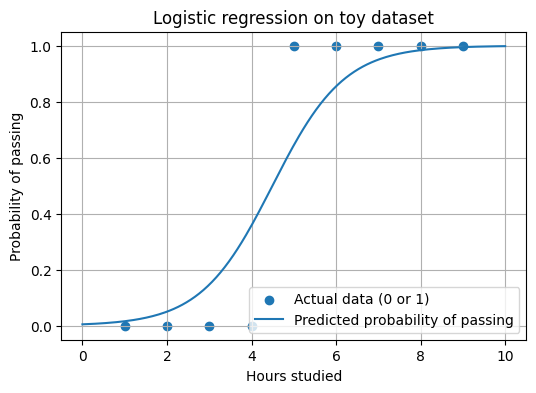

In [130]:
# Predict probabilities for a range of study hours
hours_grid = np.linspace(0, 10, 200).reshape(-1, 1)
pass_prob = toy_model.predict_proba(hours_grid)[:, 1]

# Plot data points and probability curve
plt.figure(figsize=(6, 4))
plt.scatter(hours_studied, pass_exam, label="Actual data (0 or 1)")
plt.plot(hours_grid, pass_prob, label="Predicted probability of passing")
plt.xlabel("Hours studied")
plt.ylabel("Probability of passing")
plt.title("Logistic regression on toy dataset")
plt.legend()
plt.grid(True)
plt.show()

In [131]:
# Predict for a few example students

example_hours = np.array([[2],[4],[6],[8]])
example_probs = toy_model.predict_proba(example_hours)[:, 1]
example_pred = toy_model.predict(example_hours)

results_df = pd.DataFrame({
    "hours_Studied": example_hours.flatten(),
    "Predicted_probability_pass": np.round(example_probs, 4),
    "Predicted_class": example_pred
})

results_df

,hours_Studied,Predicted_probability_pass,Predicted_class
0,2,0.0502,0
1,4,0.3582,0
2,6,0.8548,1
3,8,0.9842,1


In [132]:
#Sigmoid Function
def sigmoid(z):
  return 1/(1+np.exp(-z))

# Check some values
z_values = np.array([-5, -2, -1, 0, 1, 2, 5], dtype=float)
sig_values = sigmoid(z_values)

sig_df = pd.DataFrame({
    "z": z_values,
    "sigmoid(z)": np.round(sig_values, 4)
})

sig_df

#Here sigmid(0) = 0.5
# and z<0 then sigmoid()<0.5
# and z>0 then sigmoid()>0.5


,z,sigmoid(z)
0,-5.0,0.0067
1,-2.0,0.1192
2,-1.0,0.2689
3,0.0,0.5000
4,1.0,0.7311
5,2.0,0.8808
6,5.0,0.9933


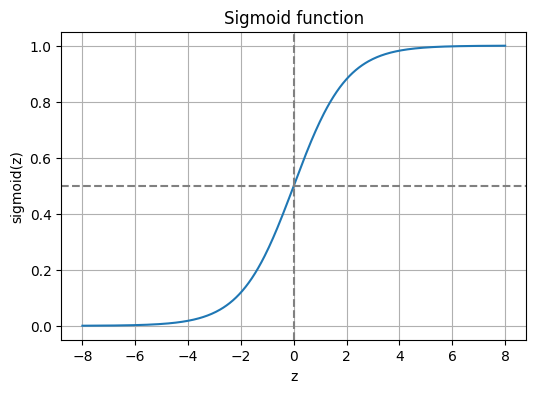

In [133]:
# Plot the sigmoid curve
z_grid = np.linspace(-8, 8, 400)
sig_grid = sigmoid(z_grid)

plt.figure(figsize=(6, 4))
plt.plot(z_grid, sig_grid)
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.title("Sigmoid function")
plt.grid(True)
plt.axhline(0.5, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.show()

In [134]:
probabilities = np.array([0.1, 0.3, 0.48, 0.49, 0.5, 0.7, 0.9])
threshold = 0.49
pred_class = (probabilities >= 0.49).astype(int)

thresh_df = pd.DataFrame({
    "Probability": probabilities,
    "Class_at_thereshold_0.49": pred_class
})

thresh_df

,Probability,Class_at_thereshold_0.49
0,0.10,0
1,0.30,0
2,0.48,0
3,0.49,1
4,0.50,1
5,0.70,1
6,0.90,1


In [135]:
# Logistic Regression on a Real Dataset
data = load_breast_cancer()
X_full = data.data
y_full = data.target

print("Feature matrix shape:", X_full.shape)
print("Target shape:", y_full.shape)
print("Classes:", data.target_names)

Feature matrix shape: (569, 30)
Target shape: (569,)
Classes: ['malignant' 'benign']


In [136]:
# Create a DataFrame for easier expoloration
feature_name = data.feature_names
df = pd.DataFrame(X_full, columns = feature_name)
df["target"] = y_full

df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [137]:
#Explore the data with describe()
df.describe().T.head(30)

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [138]:
df['target'].value_counts()

,count
target,
1,357
0,212


In [139]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=42, stratify=y_full)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [140]:
X_train_scaled[:5]

array([[-0.62931657, -0.21649893, -0.59738678, -0.62548809, -0.19533189,
         0.20785507, -0.28432816, -0.44780635,  0.56522056,  0.0423457 ,
        -0.39006791,  0.6243002 , -0.37933964, -0.40989683,  0.59457569,
         0.89710453,  0.87686018,  0.97499328,  0.87458339,  0.35097381,
        -0.61852182,  0.23410861, -0.61944411, -0.60623807,  0.34590189,
         0.31956509,  0.03452757, -0.00457353,  0.81338942, -0.02021065],
       [ 0.13813078, -0.83698579,  0.03080374,  0.0283657 , -1.43213035,
        -1.30791982, -0.92482352, -0.77239232, -0.66346986, -1.44250201,
        -0.31956338, -0.56461656, -0.44460013, -0.24885454, -0.67754882,
        -1.08007131, -0.87163711, -0.88103213, -0.68380954, -1.08712196,
         0.04473127, -0.63617451, -0.10024899, -0.06626958, -1.35630427,
        -1.16274727, -1.06781391, -0.85444526, -0.60383157, -1.48897416],
       [-0.12991149, -0.96294929, -0.14955565, -0.20850527, -0.97143178,
        -0.5461603 , -0.57896344, -0.61997804, -0

In [141]:
# train logistic regression on the scaled data
clf = LogisticRegression(max_iter=100)
clf.fit(X_train_scaled, y_train)

y_test_pred = clf.predict(X_test_scaled)
y_test_proba = clf.predict_proba(X_test_scaled)[:, 1]
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Test Accuracy: 0.9523809523809523


In [142]:
# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix:\n",cm)

Confusion matrix:
 [[15  1]
 [ 1 25]]


In [143]:
print("\nClassification repot:\n", classification_report(y_test, y_test_pred))


Classification repot:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.96      0.96      0.96        26

    accuracy                           0.95        42
   macro avg       0.95      0.95      0.95        42
weighted avg       0.95      0.95      0.95        42



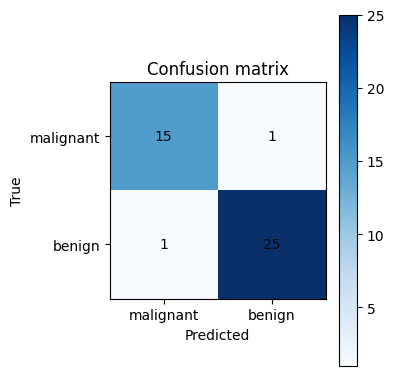

In [144]:
# Visual confusion matrix
plt.figure(figsize=(4, 4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion matrix")
plt.colorbar()
tick_labels = data.target_names
plt.xticks([0, 1], tick_labels)
plt.yticks([0, 1], tick_labels)
plt.xlabel("Predicted")
plt.ylabel("True")

# Add numbers to each cell
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

In [145]:
# Basic metrics at default threshold 0.5
acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 score:", f1)

Accuracy: 0.9523809523809523
Precision: 0.9615384615384616
Recall: 0.9615384615384616
F1 score: 0.9615384615384616


In [146]:

thresholds = np.linspace(0.1, 0.9, 9)
rows = []

for thr in thresholds:
  y_thr_pred = (y_test_proba >= thr).astype(int)
  acc_thr = accuracy_score(y_test, y_thr_pred)
  prec_thr = precision_score(y_test, y_thr_pred)
  rec_thr = recall_score(y_test, y_thr_pred)
  f1_thr = f1_score(y_test, y_thr_pred)
  rows.append([thr, acc_thr, prec_thr, rec_thr, f1_thr])

thr_df = pd.DataFrame(rows, columns=["threshold", "accuracy", "precision", "recall", "f1"])
thr_df

,threshold,accuracy,precision,recall,f1
0,0.1,0.952381,0.928571,1.000000,0.962963
1,0.2,0.952381,0.928571,1.000000,0.962963
2,0.3,0.952381,0.928571,1.000000,0.962963
3,0.4,0.952381,0.961538,0.961538,0.961538
4,0.5,0.952381,0.961538,0.961538,0.961538
5,0.6,0.952381,0.961538,0.961538,0.961538
6,0.7,0.952381,0.961538,0.961538,0.961538
7,0.8,0.976190,1.000000,0.961538,0.980392
8,0.9,0.928571,1.000000,0.884615,0.938776


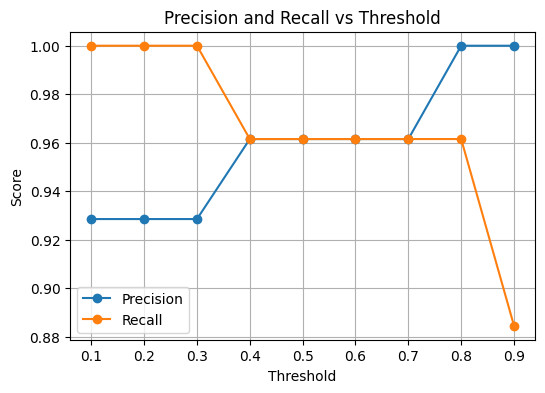

In [147]:
# Plot precision and recall vs threshold
plt.figure(figsize=(6, 4))
plt.plot(thr_df["threshold"], thr_df["precision"], marker="o", label="Precision")
plt.plot(thr_df["threshold"], thr_df["recall"], marker="o", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.grid(True)
plt.legend()
plt.show()

# Decreasing the threshold usually increases recall but may reduce precision.

## L2 Regularization

Regularization helps control model complexity by shrinking coefficients.

In sklearn's `LogisticRegression`:
- `penalty="l2"` is the default
- `C` controls strength of regularization. Smaller `C` means stronger regularization.

Here we:
- Train two models with different `C` values
- Compare their coefficients and performance.


In [149]:
# Two models with different regularization strengths
clf_weak_reg = LogisticRegression(max_iter=100, C=1000.0)
clf_strong_reg = LogisticRegression(max_iter=100, C=0.01)

clf_weak_reg.fit(X_train_scaled, y_train)
clf_strong_reg.fit(X_train_scaled, y_train)

y_pred_weak = clf_weak_reg.predict(X_test_scaled)
y_pred_strong = clf_strong_reg.predict(X_test_scaled)

print("Weak reg (C=1000) test accuracy: ", accuracy_score(y_test, y_pred_weak))
print("Strong reg (C=0.01) test accuracy: ", accuracy_score(y_test, y_pred_strong))

Weak reg (C=1000) test accuracy:  0.9285714285714286
Strong reg (C=0.01) test accuracy:  0.9285714285714286


In [151]:
# Compare coefficient magnitudes according to C values
coef_weak = clf_weak_reg.coef_[0]
coef_strong = clf_strong_reg.coef_[0]

coef_df = pd.DataFrame({
    "feature": feature_name,
    "coef_weak_C_1000":coef_weak,
    "coef_strong_C_0.01":coef_strong
})

coef_df.head(15)

,feature,coef_weak_C_1000,coef_strong_C_0.01
0,mean radius,7.740100,-0.222805
1,mean texture,-2.498849,-0.189262
2,mean perimeter,5.979527,-0.220605
3,mean area,2.646875,-0.205616
4,mean smoothness,-3.527162,-0.095387
5,mean compactness,12.742870,-0.092903
6,mean concavity,-13.305543,-0.168992
7,mean concave points,-2.545385,-0.223069
8,mean symmetry,2.796964,-0.062803
9,mean fractal dimension,-0.816712,0.093506


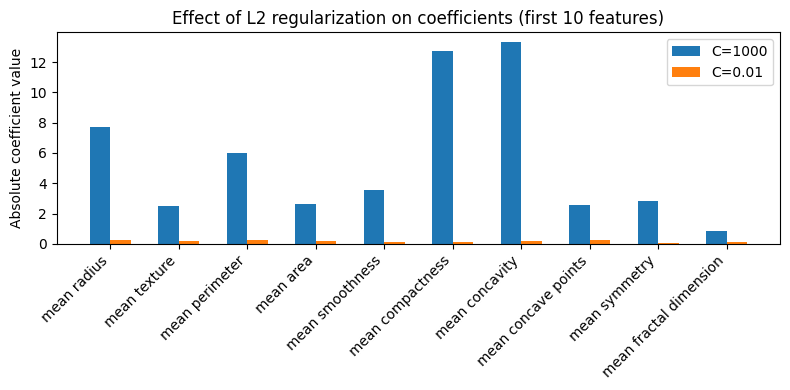

In [153]:
# Plot absolute values for the first 10 coefficients
n_plot = 10
indices = np.arange(n_plot)

plt.figure(figsize=(8, 4))
plt.bar(indices - 0.15, np.abs(coef_weak[:n_plot]), width=0.3, label="C=1000")
plt.bar(indices + 0.15, np.abs(coef_strong[:n_plot]), width=0.3, label="C=0.01")
plt.xticks(indices, feature_name[:n_plot], rotation=45, ha="right")
plt.ylabel("Absolute coefficient value")
plt.title("Effect of L2 regularization on coefficients (first 10 features)")
plt.legend()
plt.tight_layout()
plt.show()